# Code from lecture

In [51]:
#we want to start with a single string object - once we write sth we like, we scale up 
s1="Provides for the enforcement of all provisions of law that impose sanctions against countries engaged in gross violations of human rights and that support terrorism against Iraq. Calls on the President to seek multilateral cooperation to: (1) deny dangerous technologies to Iraq; and"
print(s1)

Provides for the enforcement of all provisions of law that impose sanctions against countries engaged in gross violations of human rights and that support terrorism against Iraq. Calls on the President to seek multilateral cooperation to: (1) deny dangerous technologies to Iraq; and


In [52]:
# we define a list of women-related words - we put in Iraq. to make sure the test works (we will drop it later)
female_dict=["woman","women","female","girl","girls","Iraq."]

In [53]:
# empty list for all women-related things mentions
all_women=[]

# we will loop over our femal dict list -> each time, the list comprehension will loop over s1 and add to all_women
# all instances in which that particular word from female dictionary was found.  Note that .extend takes the elements 
# of a new list and adds them to an existing list as individual elements, not as new list-element (producing nested lists)
# as .append would - experiment with .append! 

for word in female_dict:
    all_women.extend([x for x in s1.split() if x==word])

In [54]:
print("I found ", len(all_women), "cases of women mentioned: ", all_women)

I found  1 cases of women mentioned:  ['Iraq.']


In [55]:
# now that we know this sort of works, let's fine-tune, specifically, let's clean up and lower text
# I will not throw out stop words since for this example I do not care that text contains them

# remember you need regular expressions loaded for some of the commands!

import re

def clean_sanctions(sometextasargument):
    # note that whatever we pass to function as argument when invoked will become assigned to object sometextasargument, 
    # will then be assigned to object text which will keep changing until we assign it to object sometextasoutput
    text=sometextasargument.replace('\n\n','')
    text=text.lower()
    text= re.sub('[^A-Za-z0-9]+', ' ', text)
    text=re.sub(r'[0-9]+', " ", text)     
    sometextasoutput=text
    # finally, we ask the function returns what it did:  
    return (sometextasoutput)

In [56]:
# let's check what fn returns by passing to it the string object s1
# a remark on the function - I could have used "text" throughout so no "sometextasargument", "sometextasoutput"
# to the same effect - make sure you see that this works too
# note that unless you tell the fn what you want returned, it will perform the things you said and return...nothing! so "return!"

In [57]:
print(clean_sanctions(s1))

provides for the enforcement of all provisions of law that impose sanctions against countries engaged in gross violations of human rights and that support terrorism against iraq calls on the president to seek multilateral cooperation to   deny dangerous technologies to iraq and


In [58]:
# note that now I should specify my dictionary list again so that it contains only lower case words with no punctuation:

female_dict=["woman","women","female","girl","girls","iraq"]

all_women=[]

# note also that now I split the output of the function, clean_sanctions(s1), and not the original string s1!

for word in female_dict:
    all_women.extend([x for x in clean_sanctions(s1).split() if x==word])
print("I found ", len(all_women), "cases of women mentioned: ", all_women)

#you will notice that now I find more - because I cleaned up the text beforehand

I found  2 cases of women mentioned:  ['iraq', 'iraq']


In [61]:
import csv

tsv_file = open("/Users/Ashrakat/Desktop/sascat_excerpt.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")
all_lines=[]
for line in read_tsv:
    print(line)
    all_lines.append(line)
tsv_file.close() # we see here each row is now saved as a list, in a list: all_lines

['id-snippet', 'n-sentences', 'n-words', 'n-nouns', 'n-adj', 'n-verbs', 'n-entities', 'n-vague', 'n-concrete', 'n-conditionals', '']
['hr5114-101.1', '20', '839', '441', '83', '87', '76', '3', '4', '5', "Provides for the enforcement of all provisions of law that impose sanctions against countries engaged in gross violations of human rights and that support terrorism against Iraq. Calls on the President to seek multilateral cooperation to: (1) deny dangerous technologies to Iraq; and (2) induce Iraq to respect internationally recognized human rights and to allow international humanitarian and human rights organizations to have access to Iraq and Kuwait. Prohibits, as part of the sanctions against Iraq: (1) any sales to Iraq under the Arms Export Control Act; (2) the issuance of licenses for the export to Iraq of items on the U.S. Munitions List; (3) exports to Iraq of certain goods or technology listed under the Export Administration Act of 1979; (4) the issuance of licenses of authoriz

In [62]:
#let's look at where text is, row 2, cell 11:

all_lines[1][10]

"Provides for the enforcement of all provisions of law that impose sanctions against countries engaged in gross violations of human rights and that support terrorism against Iraq. Calls on the President to seek multilateral cooperation to: (1) deny dangerous technologies to Iraq; and (2) induce Iraq to respect internationally recognized human rights and to allow international humanitarian and human rights organizations to have access to Iraq and Kuwait. Prohibits, as part of the sanctions against Iraq: (1) any sales to Iraq under the Arms Export Control Act; (2) the issuance of licenses for the export to Iraq of items on the U.S. Munitions List; (3) exports to Iraq of certain goods or technology listed under the Export Administration Act of 1979; (4) the issuance of licenses of authorizations under the Atomic Energy Act of 1954 for the export to Iraq of nuclear materials, facilities, and technology; (5) U.S. support for loans or financial or technical assistance to Iraq by internationa

In [63]:
all_lines[0][10]# we do not need top row - it has datanames (after pop, all_lines[0][10] will produce text above, formerly all_lines[1][10])
all_lines.pop(0)

['id-snippet',
 'n-sentences',
 'n-words',
 'n-nouns',
 'n-adj',
 'n-verbs',
 'n-entities',
 'n-vague',
 'n-concrete',
 'n-conditionals',
 '']

In [64]:
#let's open a new file, then a loop, then write each line as we process the relevant cell and close
#f1 = open("sascat_women.txt","w",encoding="utf8") -> f1.write("something") in a loop, with lines and tabs,
#I will also write a new function:
#note where argument appears
# and then f1.close(), let's try

In [65]:
#and note that I used y in function now to avoid clash with x I use in the bigger loop
#and note that what I want returned is a string of the number of times mentioned and the list with mentions

def women_mentions(argument):
    female_dict=["woman","women","female","girl","girls"]
    all_women=[]
    for word in female_dict:
        all_women.extend([y for y in clean_sanctions(argument).split() if y==word])
    return (str(len(all_women)),all_women)

In [66]:
#good to check
print(women_mentions(all_lines[0][10]))

('0', [])


In [67]:
f1 = open("sascat_women.txt","w",encoding="utf8")

# remember all_lines is the big list and now x will be the nested list (row) on each iteration
# we need to save: id-snippet identifier, and the product of the search for women in 11th column

for x in all_lines:
    f1.write(x[0]+"\t"+str(women_mentions(x[10]))+"\n")

f1.close()

In [68]:
#ok so we are done.  Note that file has no variable names, you can change script to add this as first row of file
#when writing or you can add manually later
#note that file will have an extra, blank new line at the end - we always end with +"\n" - this is no big deal
#it can be avoided if you check for wether you are near the end of your list - but too much work for paltry reward



In [69]:
#note also: with women_mentions(), you now have a FN within  a FN -> so to run this, makes sure clean_sanctions() is defined  before women_mentions() is executed!

# Session outline:

1. Go over homework 4
2. Managing Data with Pandas
3. Manipulating Data with Pandas
4. Mini visualization
4. Short intro to Numpy 

# Lets load our needed libraries

In [1]:
import numpy as np
from numpy import *
from numpy import random # random data
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords

# Pandas


![pandas1](https://media.giphy.com/media/Wa5JDuv6kzoTC/giphy.gif)


## Why is Pandas AMAZING?

1. super easy loading in data
2. easy data cleaning
3. easy data manipulation
4. easy merging and extraction


### Lets learn to load data in pandas

We are going to start with yesterdays data - German Sputnik Newspaper articles

**Lets open the dataset from yesterday using Python's open function**

In [2]:
with open('/Users/Ashrakat/Dropbox/University/Oxford/Jobs/Teaching/Text Analysis/code/Basics-of-Text-Analysis-for-Political-Science/Data/sputnikgerman20.tsv','r') as tsv:
    data = [line.strip().split('\t') for line in tsv]
    
data

[['"http://de.sputniknews.compolitik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz"',
  '"http://web.archive.org/web/20170227192503/https://de.sputniknews.com/amp/politik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz/"',
  '20160107',
  '"FDP-Chef Lindner: Merkels Flüchtlingspolitik führt Europa ins Chaos"',
  '"Der Satz „Wir schaffen das“ der Bundeskanzlerin ersetze kein Regierungshandeln, so Lindner. Seiner Meinung nach ist ein „rationales, humanitäres, europäisch abgestimmtes Einwanderungsgesetz“ nötig, welches eine systematisierte Registrierung von Flüchtlingen und deren legale Integration ermöglichen würde. Die CDU/CSU-Politiker hatten von Merkel wiederholt gefordert, den Migranten-Zustrom zu begrenzen. Doch die Kanzlerin hat sich bislang geweigert, eine Obergrenze für Flüchtlinge festzulegen, was die Grenzschließung für neu ankommende Migranten bedeuten würde."',
  '"OVER-THRESHOLD"',
  '"flüchtlingen migranten flüchtl

In [3]:
#get the date
data_dates = [el[2] for el in data]


In [4]:
data_dates

['20160107',
 '20150210',
 '20181117',
 '20181109',
 '20160306',
 '20151016',
 '20151020',
 '20140106',
 '20180813',
 '20170219',
 '20151228',
 '20160614',
 '20181210',
 '20151102',
 '20170307',
 '20170207',
 '20180619',
 '20180914',
 '20131106',
 '20170715']

**Lets try with pandas**

In [5]:
sputnikdata1 = pd.read_csv('/Users/Ashrakat/Desktop/sputnikgerman20.tsv')

#why do we get an error message?

ParserError: Error tokenizing data. C error: Expected 8 fields in line 3, saw 18


In [ ]:
sputnikdata1 = pd.read_csv('/Users/Ashrakat/Desktop/sputnikgerman20.tsv',sep='\t')
sputnikdata1.head()
#what do we want to change here

In [ ]:
sputnikdata = pd.read_csv('/Users/Ashrakat/Desktop/sputnikgerman20.tsv',sep='\t', header=None)
sputnikdata

## Select Column

### how would I select the date?

In [13]:
sputnikdata_date=sputnikdata[2]
sputnikdata_date

0     20160107
1     20150210
2     20181117
3     20181109
4     20160306
5     20151016
6     20151020
7     20140106
8     20180813
9     20170219
10    20151228
11    20160614
12    20181210
13    20151102
14    20170307
15    20170207
16    20180619
17    20180914
18    20131106
19    20170715
Name: 2, dtype: int64

### Select only content and title


In [14]:
sputnikdata_content_title=sputnikdata[[3,4]]
sputnikdata_content_title

,3,4
0,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...
1,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...
2,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ..."
3,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ..."
4,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ..."
5,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ..."
6,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ..."
7,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...
8,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...
9,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...


## Select rows

In [16]:
#select 0-5

sputnikdata_rows=sputnikdata[0:6]
sputnikdata_rows

,0,1,2,3,4,5,6,7,8
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927
5,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957


## Clean Data

1. lowercase
2. remove numbers 
3. remove punctuation
3. remove stopwords

In [17]:
sputnikdata.head()

,0,1,2,3,4,5,6,7,8
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927


In [18]:
#remove not needed columns
sputnikdata2 = sputnikdata.drop(sputnikdata.columns[[0, 1,4, 5,6,7,8]], axis=1)  # df.columns is zero-based pd.Index 
sputnikdata2

,2,3
0,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...
1,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr..."
2,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...
3,20181109,Trump beschränkt drastisch Asylgewährung für i...
4,20160306,Österreich drängt auf deutsches Flüchtlingskon...
5,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...
6,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?
7,20140106,Großbritannien will EU-Freizügigkeit verhindern
8,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...
9,20170219,USA verschärfen Asyl-Recht


In [19]:
#lowercase
sputnikdata2["lowercased"]=sputnikdata2[3].str.lower()
sputnikdata2

,2,3,lowercased
0,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,fdp-chef lindner: merkels flüchtlingspolitik f...
1,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...","experte: rund 1,3 millionen wehrpflichtige ukr..."
2,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,so präzisiert nahles ihre idee für hartz iv-al...
3,20181109,Trump beschränkt drastisch Asylgewährung für i...,trump beschränkt drastisch asylgewährung für i...
4,20160306,Österreich drängt auf deutsches Flüchtlingskon...,österreich drängt auf deutsches flüchtlingskon...
5,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,migrationskrise: warschau wehrt sich gegen mer...
6,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,flüchtlingskrise: ist abriegeln eine lösung?
7,20140106,Großbritannien will EU-Freizügigkeit verhindern,großbritannien will eu-freizügigkeit verhindern
8,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,rückkehr von flüchtlingen: syrischer minister ...
9,20170219,USA verschärfen Asyl-Recht,usa verschärfen asyl-recht


In [20]:
## remove punctuation
sputnikdata2["nopunct"] = sputnikdata2['lowercased'].str.replace('[^\w\s]','')


In [21]:
sputnikdata2.head()

,2,3,lowercased,nopunct
0,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,fdp-chef lindner: merkels flüchtlingspolitik f...,fdpchef lindner merkels flüchtlingspolitik füh...
1,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...","experte: rund 1,3 millionen wehrpflichtige ukr...",experte rund 13 millionen wehrpflichtige ukrai...
2,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,so präzisiert nahles ihre idee für hartz iv-al...,so präzisiert nahles ihre idee für hartz ivalt...
3,20181109,Trump beschränkt drastisch Asylgewährung für i...,trump beschränkt drastisch asylgewährung für i...,trump beschränkt drastisch asylgewährung für i...
4,20160306,Österreich drängt auf deutsches Flüchtlingskon...,österreich drängt auf deutsches flüchtlingskon...,österreich drängt auf deutsches flüchtlingskon...


In [22]:
#remove numbers

sputnikdata2['nonumb'] = sputnikdata2['nopunct'].str.replace('\d+', '')


In [23]:
sputnikdata2.head()

,2,3,lowercased,nopunct,nonumb
0,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,fdp-chef lindner: merkels flüchtlingspolitik f...,fdpchef lindner merkels flüchtlingspolitik füh...,fdpchef lindner merkels flüchtlingspolitik füh...
1,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...","experte: rund 1,3 millionen wehrpflichtige ukr...",experte rund 13 millionen wehrpflichtige ukrai...,experte rund millionen wehrpflichtige ukraine...
2,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,so präzisiert nahles ihre idee für hartz iv-al...,so präzisiert nahles ihre idee für hartz ivalt...,so präzisiert nahles ihre idee für hartz ivalt...
3,20181109,Trump beschränkt drastisch Asylgewährung für i...,trump beschränkt drastisch asylgewährung für i...,trump beschränkt drastisch asylgewährung für i...,trump beschränkt drastisch asylgewährung für i...
4,20160306,Österreich drängt auf deutsches Flüchtlingskon...,österreich drängt auf deutsches flüchtlingskon...,österreich drängt auf deutsches flüchtlingskon...,österreich drängt auf deutsches flüchtlingskon...


In [25]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('german')

In [26]:
sputnikdata2['without_stopwords'] = sputnikdata2['nonumb'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
sputnikdata2

,2,3,lowercased,nopunct,nonumb,without_stopwords
0,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,fdp-chef lindner: merkels flüchtlingspolitik f...,fdpchef lindner merkels flüchtlingspolitik füh...,fdpchef lindner merkels flüchtlingspolitik füh...,fdpchef lindner merkels flüchtlingspolitik füh...
1,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...","experte: rund 1,3 millionen wehrpflichtige ukr...",experte rund 13 millionen wehrpflichtige ukrai...,experte rund millionen wehrpflichtige ukraine...,experte rund millionen wehrpflichtige ukrainer...
2,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,so präzisiert nahles ihre idee für hartz iv-al...,so präzisiert nahles ihre idee für hartz ivalt...,so präzisiert nahles ihre idee für hartz ivalt...,präzisiert nahles idee hartz ivalternative
3,20181109,Trump beschränkt drastisch Asylgewährung für i...,trump beschränkt drastisch asylgewährung für i...,trump beschränkt drastisch asylgewährung für i...,trump beschränkt drastisch asylgewährung für i...,trump beschränkt drastisch asylgewährung illeg...
4,20160306,Österreich drängt auf deutsches Flüchtlingskon...,österreich drängt auf deutsches flüchtlingskon...,österreich drängt auf deutsches flüchtlingskon...,österreich drängt auf deutsches flüchtlingskon...,österreich drängt deutsches flüchtlingskontingent
5,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,migrationskrise: warschau wehrt sich gegen mer...,migrationskrise warschau wehrt sich gegen merk...,migrationskrise warschau wehrt sich gegen merk...,migrationskrise warschau wehrt merkels flüchtl...
6,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,flüchtlingskrise: ist abriegeln eine lösung?,flüchtlingskrise ist abriegeln eine lösung,flüchtlingskrise ist abriegeln eine lösung,flüchtlingskrise abriegeln lösung
7,20140106,Großbritannien will EU-Freizügigkeit verhindern,großbritannien will eu-freizügigkeit verhindern,großbritannien will eufreizügigkeit verhindern,großbritannien will eufreizügigkeit verhindern,großbritannien eufreizügigkeit verhindern
8,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,rückkehr von flüchtlingen: syrischer minister ...,rückkehr von flüchtlingen syrischer minister a...,rückkehr von flüchtlingen syrischer minister a...,rückkehr flüchtlingen syrischer minister appel...
9,20170219,USA verschärfen Asyl-Recht,usa verschärfen asyl-recht,usa verschärfen asylrecht,usa verschärfen asylrecht,usa verschärfen asylrecht


In [27]:
from collections import Counter
counts= Counter(" ".join(sputnikdata2["without_stopwords"]).split()).most_common(10)
counts

[('flüchtlingen', 3),
 ('merkels', 2),
 ('europa', 2),
 ('trump', 2),
 ('migranten', 2),
 ('deutschland', 2),
 ('usa', 2),
 ('fdpchef', 1),
 ('lindner', 1),
 ('flüchtlingspolitik', 1)]

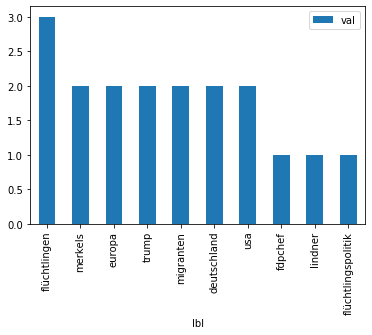

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(counts, columns=['lbl','val']).set_index('lbl').plot(kind='bar');


In [29]:
pd.Series(' '.join(sputnikdata2[3]).lower().split()).value_counts()[:10]
#what happened here

auf            4
–              4
will           4
von            3
migranten      2
europa         2
deutschland    2
usa            2
und            2
-              2
dtype: int64

## Exporting data


In [ ]:
sputnikdata2.to_csv("mydata.csv", sep='\t', encoding='utf-8')

# Numpy

This library provides you with an array data structure that holds some benefits over Python lists, such as: 
- being more compact, 
- faster access in reading and writing items, 
- being more convenient and more efficient.
- core library for scientific computing

Learning numpy is going to become very useful when we deal with word-embeddinge next week!


### create numpy arrays

- we can create them from lists, tuples, etc
- from data that we read in
- using functions


## Create Numpy Arrays


### import from list

In [30]:
vector = array([1,2,3,4])
vector

array([1, 2, 3, 4])

In [31]:
print(type(vector))

<class 'numpy.ndarray'>


### matrix

In [32]:
matrix = array([[1, 2], [3, 4]])
matrix


array([[1, 2],
       [3, 4]])

In [33]:
print(type(matrix))

<class 'numpy.ndarray'>


### checking their shape

In [34]:
print(matrix.shape)
print(vector.shape)

#columns, rows

(2, 2)
(4,)


### checking size, how many elements?

In [35]:
print(matrix.size)
print(matrix.size)

4
4


### we can not assign strings to numpy arrays

In [36]:
matrix[0,0] = "newvalue"

ValueError: invalid literal for int() with base 10: 'newvalue'

### Employing array functions

In [37]:
# create a range

x = arange(0, 10, 1) # arguments: start, stop, step

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
#lets create a matrix with 5*5 random data
random.rand(5,5)

array([[0.63864856, 0.59089421, 0.15632693, 0.5351408 , 0.09440788],
       [0.60104482, 0.60870018, 0.88146028, 0.97405032, 0.88479094],
       [0.09347289, 0.3797731 , 0.36684452, 0.56662495, 0.04797569],
       [0.67514501, 0.75688953, 0.15891747, 0.65640645, 0.05657412],
       [0.82893748, 0.82067302, 0.87837655, 0.27669047, 0.95883573]])

In [39]:
# standard normal distributed random numbers
random.randn(5,5)

array([[ 0.15893342, -1.46218821, -0.48149857, -0.62729046,  0.4201284 ],
       [ 2.4489779 , -0.73270806, -1.24887009, -2.04339958,  0.87147145],
       [ 0.14359937, -1.15722358,  1.62525574,  0.66783408, -0.1936124 ],
       [ 1.05595642, -1.167382  , -1.05430594,  1.37905317,  0.93814251],
       [ 0.06102939,  1.16951171, -1.16934506, -0.54406284, -0.30826701]])

In [40]:
zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Indexing

In [41]:
vector = array([1,2,3,4])
vector[0]

1

In [42]:
matrix


array([[1, 2],
       [3, 4]])

In [43]:
matrix[1,1]

4

In [44]:
matrix[1,:] # row 1

array([3, 4])

In [45]:
matrix[:,1] # column 1

array([2, 4])

In [46]:
##asign values

matrix[0,1] = 0 #rows, columns
matrix

array([[1, 0],
       [3, 4]])

In [ ]:
### read data from numpys

In [47]:
data= np.loadtxt(open("/Users/Ashrakat/Dropbox/University/Oxford/Jobs/Teaching/Text Analysis/code/Basics-of-Text-Analysis-for-Political-Science/Data/numpydata.csv", "rb"),\
              delimiter=",", skiprows=1)
data

array([[6.11882430e+02, 9.08956010e+03, 5.13300000e+03, 8.64075140e+02,
        1.71537476e+03, 7.65227770e+02, 1.29111196e+12],
       [6.11882430e+02, 9.08956010e+03, 5.13300000e+03, 8.64075140e+02,
        1.71537476e+03, 7.65227770e+02, 1.29111311e+12],
       [6.11882430e+02, 9.08956010e+03, 5.13300000e+03, 8.64075140e+02,
        1.71537476e+03, 7.65227770e+02, 1.29112065e+12]])

In [48]:
#if we want to take a look at the first column
data[:,0]

array([611.88243, 611.88243, 611.88243])

In [ ]:
data.shape

In [49]:
data[:,5].mean() #column 5 mean

765.22777

In [ ]:
### store data

In [50]:
M = random.rand(3,3)
savetxt("random-matrix.csv", M)


![pandas2](https://media.giphy.com/media/EatwJZRUIv41G/giphy.gif)


# Excercises:

**Excercise 1**

In Pandas

- a) use sputnikgerman20 data
- b) check the length of the dataframe
- c) take a random sample of 5 rows
- d) remove all columns, but keep columns 2, 3 and 4 (remeber python starts counting at 0)
- e) rename those columns date, title, and content (old 2 is date 3 is title, old 4 is content)
- f) merge title and content in a new column (while keeping the old columns) - title_content
- g) write a datacleaning function, that will do the main steps we discussed
- h) clean column title_content
- i) in the data variable/column keep only the year (remove months and day)

**Excercise 2**

This data set is about congressional sanctions. Each document of the congress that issues sanctions has a different id, saved in the column id-snippet

1. Load data - sascat_excerpt.tsv in a pandas dataframe
2. Rename the last variable = content
3. get the averages a) of the number of words, b) number of sentences
3. keep only these columns id-snippet and content
5. count number of words in content column, create a new column and paste the total count there
6. export data as tsv


**Excercise 3**

Use the data from excercise 2 (column content) to:

- Identify mentions of countries in each sanctions documents
- You will need to identify the total number of country mentions
- You will also need to identify which countries  are mentioned
- You need two new columns: a) mentions of countries 2) column that saves the names of each country mentioned

The dictionary of countries is saved below.

You can choose to do this in pandas or in any other way (check what we have learned in class).

In [ ]:
countries = ['United States of America', 'Canada', 'Bahamas', 'Cuba', 'Haiti', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Barbados', 'Mexico', 'Belize', 'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Colombia', 'Venezuela', 'Guyana', 'Surinam', 'Ecuador', 'Peru', 'Brazil', 'Bolivia', 'Paraguay', 'Chile', 'Argentina', 'Uruguay', 'United Kingdom', 'Ireland', 'Netherlands', 'Belgium', 'Luxembourg', 'France', 'Switzerland', 'Spain', 'Portugal', 'German Federal Republic', 'German Democratic Republic', 'Poland', 'Austria', 'Hungary', 'Czechoslovakia', 'Czech Republic', 'Slovakia', 'Italy/Sardinia', 'Malta', 'Albania', 'Montenegro', 'Macedonia (Former Yugoslav Republic of)', 'Croatia', 'Serbia', 'Yugoslavia', 'Bosnia-Herzegovina', 'Kosovo', 'Slovenia', 'Greece', 'Cyprus', 'Bulgaria', 'Moldova', 'Rumania', 'Russia (Soviet Union)', 'Estonia', 'Latvia', 'Lithuania', 'Ukraine', 'Belarus (Byelorussia)', 'Armenia', 'Georgia', 'Azerbaijan', 'Finland', 'Sweden', 'Norway', 'Denmark', 'Iceland', 'Cape Verde', 'Guinea-Bissau', 'Equatorial Guinea', 'Gambia', 'Mali', 'Senegal', 'Benin', 'Mauritania', 'Niger', 'Cote D\x92Ivoire', 'Guinea', 'Burkina Faso (Upper Volta)', 'Liberia', 'Sierra Leone', 'Ghana', 'Togo', 'Cameroon', 'Nigeria', 'Gabon', 'Central African Republic', 'Chad', 'Congo', 'Congo, Democratic Republic of (Zaire)', 'Uganda', 'Kenya', 'Tanzania/Tanganyika', 'Zanzibar', 'Burundi', 'Rwanda', 'Somalia', 'Djibouti', 'Ethiopia', 'Eritrea', 'Angola', 'Mozambique', 'Zambia', 'Zimbabwe (Rhodesia)', 'Malawi', 'South Africa', 'Namibia', 'Lesotho', 'Botswana', 'Swaziland', 'Madagascar', 'Comoros', 'Mauritius', 'Morocco', 'Algeria', 'Tunisia', 'Libya', 'Sudan', 'South Sudan', 'Iran (Persia)', 'Turkey (Ottoman Empire)', 'Iraq', 'Egypt', 'Syria', 'Lebanon', 'Jordan', 'Israel', 'Saudi Arabia', 'Yemen (Arab Republic of Yemen)', "Yemen, People's Republic of", 'Kuwait', 'Bahrain', 'Qatar', 'United Arab Emirates', 'Oman', 'Afghanistan', 'Turkmenistan', 'Tajikistan', 'Kyrgyz Republic', 'Uzbekistan', 'Kazakhstan', 'China', 'Tibet', 'Mongolia', 'Taiwan', "Korea, People's Republic of", 'Korea, Republic of', 'Japan', 'India', 'Bhutan', 'Pakistan', 'Bangladesh', 'Myanmar (Burma)', 'Sri Lanka (Ceylon)', 'Maldives', 'Nepal', 'Thailand', 'Cambodia (Kampuchea)', 'Laos', 'Vietnam, Democratic Republic of', 'Vietnam, Republic of', 'Malaysia', 'Singapore', 'Brunei', 'Philippines', 'Indonesia', 'East Timor', 'Australia', 'Papua New Guinea', 'New Zealand', 'Solomon Islands', 'Fiji']


**Excercise 4**

Create an array of the following list:
list1=[1,2,3,4,5,6]

**Excercise 5**

Create a matrix that hosts the numbers from 0-20. It should have 4 rows and 5 columns


**Excercise 6**

Create a numpy array of 1's. In a 3*4 matrix.

**Excercise 7**


Create a numpy array of random numbers in 10*3 matrix

**Excercise 8**

1. Write code to check what the first 4 items of this array are
2. Change the first two items to -1 and -2

a_array = array([6,7,20,300,1,3,4])


**Excercise 9**

1. multiply the following array with itself

a_array = array([6,7,20,300,1,3,4])


** Excercise 10**

1. check the shape of the matrix
2. Add the numbers in positions as an extra column in position 0



In [ ]:
matrix = [[0.1, 0.3], [0.7, 0.8], [0.8, 0.8]]

positions = [10, 20, 30]


**Excercise 11**

*Practicing Loops*:

Print First 10 natural numbers using while loop



** Excercise 12**

*Practicing Loops*:

Print -10 to -1 using for loop


**Excercise 13**

*Practicing Manipulating Data in Pandas*:


- Use pandas to create two dataframes from the dictionaries below
- Merge both dataframes, so that the second data frame is a new column to the first data frame.


In [ ]:
itemsavailable = {'Product': ['Nivea', 'Clinique', 'Dior', 'La_Mer'], 'Quantity': [344535335, 176666995, 199935925 , 71499900]}
prices = {'Product': ['Nivea', 'Clinique', 'Dior', 'La_Mer'], 'price': [141, 80, 182 , 160]}